In [1]:
# Import libraries
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
# Download GOOG historical data
hist_data = yf.download(['GOOG'], start='2023-07-01', end='2023-12-30')['Close']
hist_data

[*********************100%***********************]  1 of 1 completed


Date
2023-07-03    120.559998
2023-07-05    122.629997
2023-07-06    120.930000
2023-07-07    120.139999
2023-07-10    116.870003
                 ...    
2023-12-22    142.720001
2023-12-26    142.820007
2023-12-27    141.440002
2023-12-28    141.279999
2023-12-29    140.929993
Name: Close, Length: 126, dtype: float64

In [3]:
# Compute daily log-returns
log_rets = np.log(hist_data/hist_data.shift(1))
log_rets = log_rets.dropna()
log_rets

Date
2023-07-05    0.017024
2023-07-06   -0.013960
2023-07-07   -0.006554
2023-07-10   -0.027595
2023-07-11    0.007162
                ...   
2023-12-22    0.006467
2023-12-26    0.000700
2023-12-27   -0.009710
2023-12-28   -0.001132
2023-12-29   -0.002480
Name: Close, Length: 125, dtype: float64

In [4]:
# Compute the sample standard deviation of daily log-returns
import statistics as stat
vol_day = stat.stdev(log_rets)
vol_day

0.017525001793481914

In [5]:
# Compute volatility per year
vol_year = vol_day * np.sqrt(250)
vol_year

0.2770946083296932

In [6]:
# Count non-negative log-returns
log_rets[log_rets >= 0]

Date
2023-07-05    0.017024
2023-07-11    0.007162
2023-07-12    0.016096
2023-07-13    0.042633
2023-07-14    0.006945
                ...   
2023-12-19    0.006611
2023-12-20    0.011233
2023-12-21    0.015207
2023-12-22    0.006467
2023-12-26    0.000700
Name: Close, Length: 68, dtype: float64

In [7]:
# Estimate parameter p
p = len(log_rets[log_rets >= 0]) / len(log_rets)
p

0.544

In [8]:
# Estimate parameter sigma
sigma = vol_year

In [9]:
# Risk-free interest rate of 1 month US T-bill free rate on an annual basis
r_year = 5.60 / 100
r_year

0.055999999999999994

In [10]:
# Length of daily periods as a fraction of trading year (assuming 250 trading days per year)
Delta_t = 1 / 250

In [11]:
r_day = (1 + r_year)**Delta_t - 1

In [12]:
# Risk-free interest rate on a daily basis
r = r_day
r

0.0002179764945606788

In [13]:
# Up parameter
u = np.exp(sigma * np.sqrt(Delta_t))
u

1.017679465644525

In [14]:
# Down parameter
d = np.exp(-sigma * np.sqrt(Delta_t))
d

0.9826276679039329

In [15]:
# Risk-neutral probability measure parameter
q = ((1 + r) - d) / (u - d)
q

0.5018375582561687

In [16]:
# GOOG stock price at date 2023-12-29
S0 = (yf.download(['GOOG'], start='2023-12-29', end='2023-12-30')['Close'])

[*********************100%***********************]  1 of 1 completed


In [17]:
S0

Date
2023-12-29    140.929993
Name: Close, dtype: float64

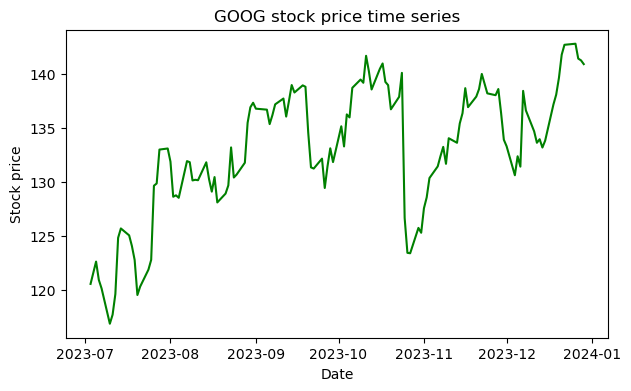

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.title('GOOG stock price time series')
plt.plot(hist_data,label='GOOG stock price',c='green')
plt.xlabel('Date')
plt.ylabel('Stock price')
plt.savefig('goog_stock_price.png', dpi=300)